In [1]:
import scipy.io as sio
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

mat = sio.loadmat('yeastdata', squeeze_me=True)
genes = mat['genes']
times = mat['times']
yeastvalues = mat['yeastvalues']

In [2]:
nonemptySpots = genes != 'EMPTY'
genes = genes[nonemptySpots]
yeastvalues = yeastvalues[nonemptySpots,:]
masknan = ([min(~(np.isnan(yeast)))  for yeast in yeastvalues])
yeastvalues = yeastvalues[masknan,:]
genes = genes[masknan]

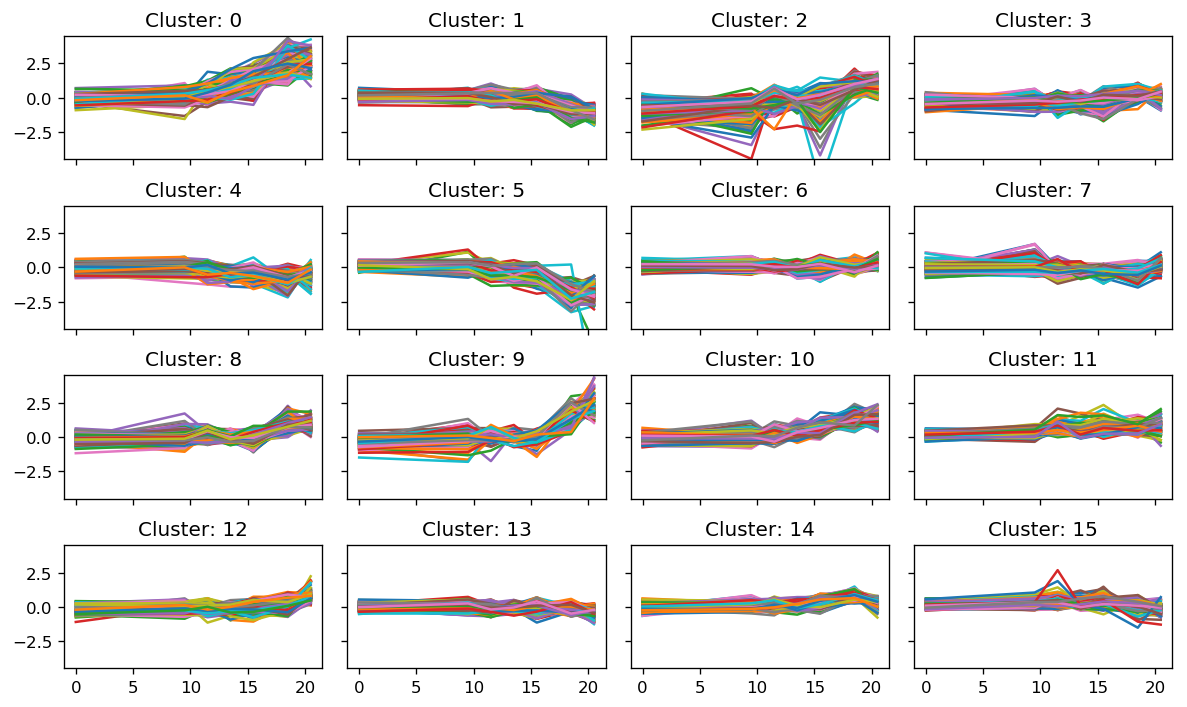

In [3]:
# Hierarchichal Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=16, affinity='euclidean', linkage='ward')  
cluster.fit_predict(yeastvalues)


fig, axes = plt.subplots(4,4, figsize=(10,6), sharex=True, sharey=True, dpi=120)


# Plot each axes
for i, x in enumerate(axes.ravel()):
    cluster_i_mask = (cluster.labels_ == i)
    cluster_i = yeastvalues[cluster_i_mask]
    for j in range(1,len(cluster_i)):
        x.plot(times,cluster_i[j,:])
        x.set_title('Cluster: ' + str(i))
    x.set_ylim([-4.5,4.5])  
plt.tight_layout()
plt.show()

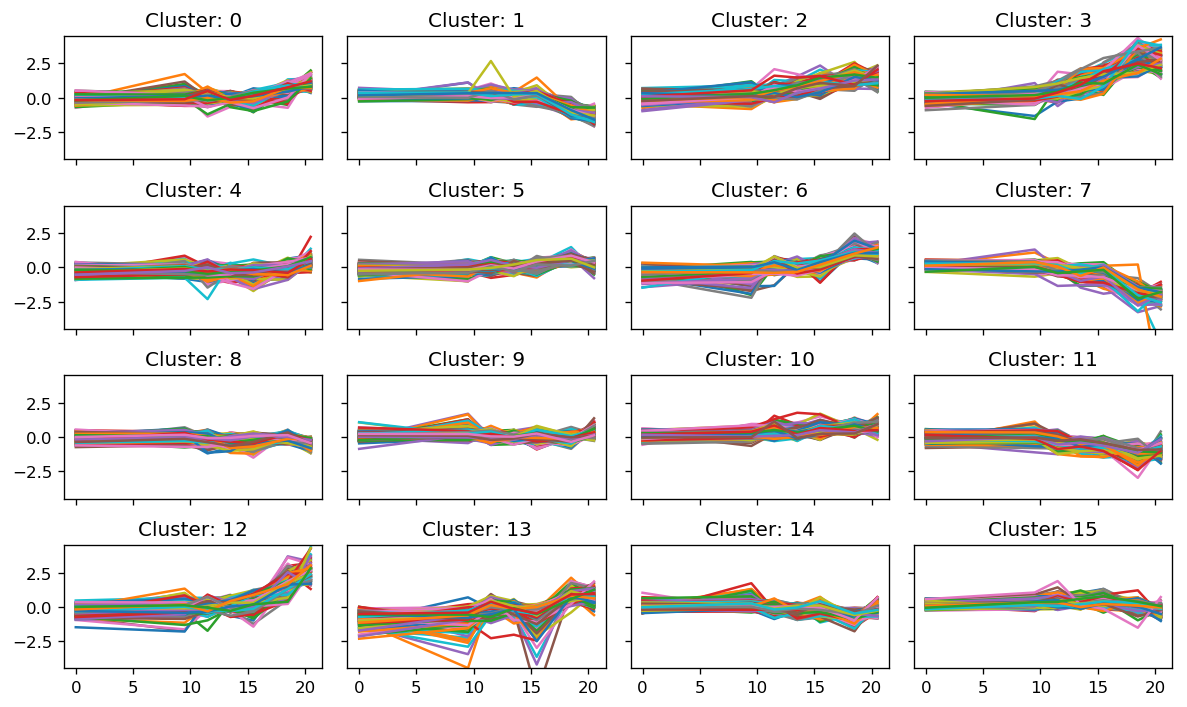

In [4]:
# K-means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16) # Cluster the passenger records into 2: Survived or Not survived
kmeans.fit(yeastvalues)
cluster_labels = kmeans.predict(yeastvalues)


fig, axes = plt.subplots(4,4, figsize=(10,6), sharex=True, sharey=True, dpi=120)


# Plot each axes
for i, x in enumerate(axes.ravel()):
    cluster_i_mask = (cluster_labels == i)
    cluster_i = yeastvalues[cluster_i_mask]
    for j in range(1,len(cluster_i)):
        x.plot(times,cluster_i[j,:]) 
        x.set_title('Cluster: ' + str(i))
    x.set_ylim([-4.5,4.5])
   
plt.tight_layout()
plt.show()


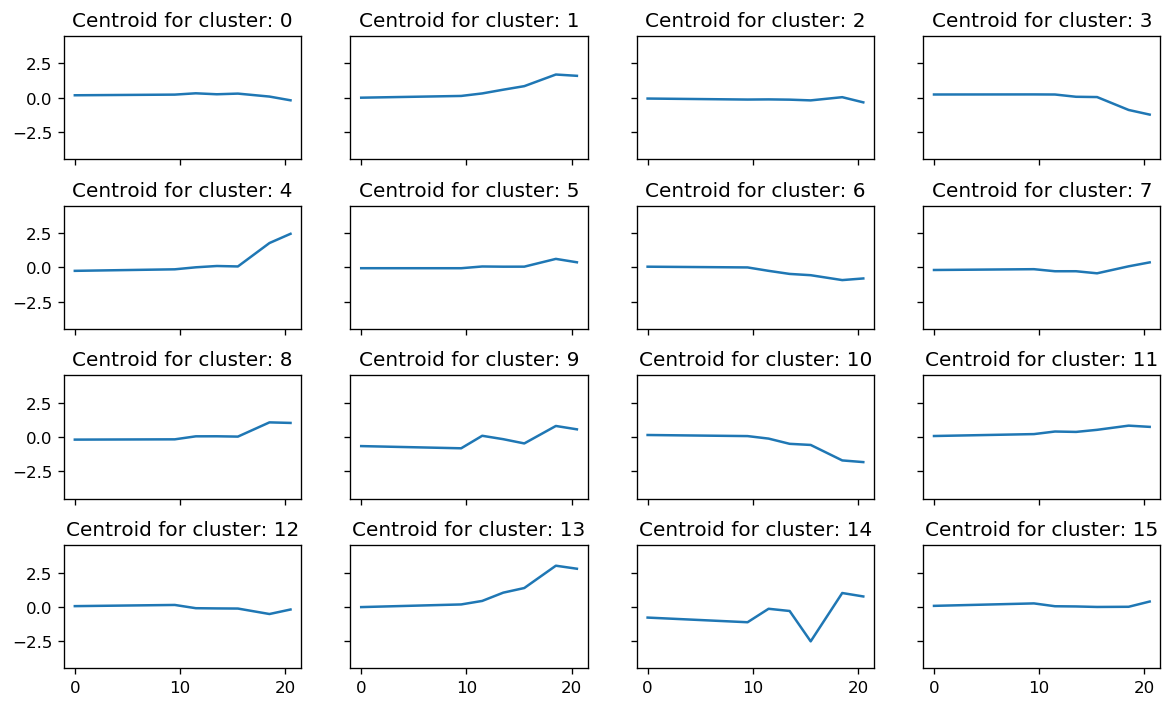

In [5]:
# Centroid plots for each cluster

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16) # Cluster the passenger records into 2: Survived or Not survived
kmeans.fit(yeastvalues)
cluster_labels = kmeans.predict(yeastvalues)


fig, axes = plt.subplots(4,4, figsize=(10,6), sharex=True, sharey=True, dpi=120)

# Plot each axes
for i, x in enumerate(axes.ravel()):
    cluster_i_mask = (cluster_labels == i)
    cluster_i = yeastvalues[cluster_i_mask]
    centroid_i = cluster_i.mean(axis=0)
    x.plot(times,centroid_i)
    x.set_title('Centroid for cluster: ' + str(i))
    x.set_ylim([-4.5,4.5])   
plt.tight_layout()
plt.show()

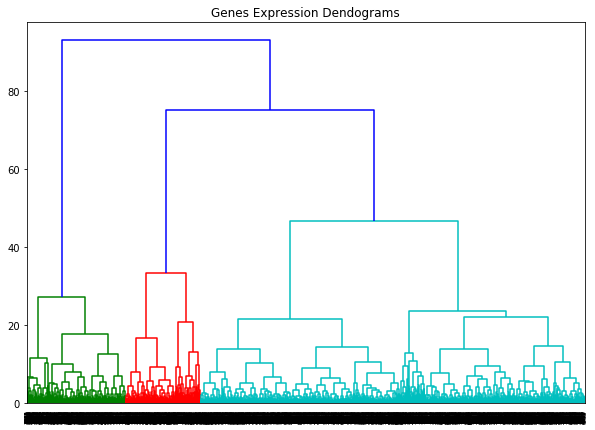

In [6]:
# Dendogram plot for hierarchical clustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Genes Expression Dendograms")  
dend = shc.dendrogram(shc.linkage(yeastvalues, method='ward'))